<a href="https://colab.research.google.com/github/zahorkim/musthave-pracmachinlearing/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data=pd.read_csv(file_url)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [3]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,173.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.989091,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.362370,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.804431,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.126153,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.355000,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.260000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.672500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.450000,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.750000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
data['class'].unique()

array([0, 1, 2])

In [5]:
data['class'].nunique()

3

In [6]:
data['class'].value_counts()

,count
class,
1,71
0,59
2,48


<Axes: xlabel='class', ylabel='count'>

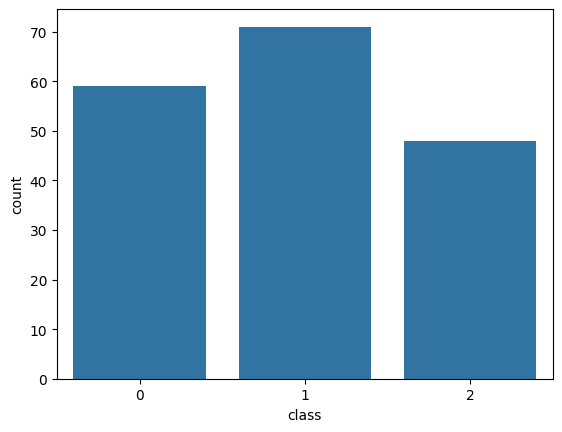

In [7]:
sns.barplot(x=data['class'].value_counts().index, y=data['class'].value_counts())

<Axes: ylabel='count'>

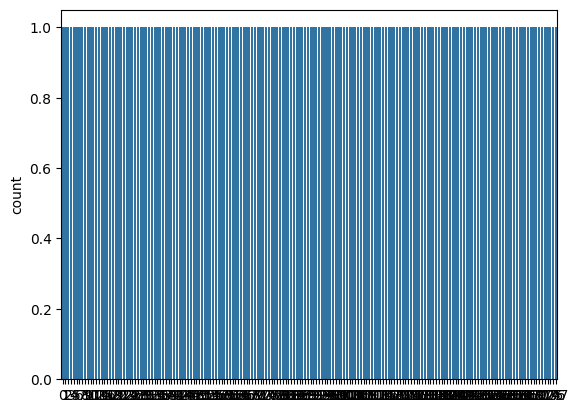

In [8]:
sns.countplot(data['class'])

In [9]:
data.isna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.sum()

,0
alcohol,2286.080000
malic_acid,415.870000
ash,421.240000
alcalinity_of_ash,3470.100000
magnesium,17754.000000
total_phenols,408.530000
flavanoids,361.210000
nonflavanoid_phenols,62.690000
proanthocyanins,283.180000
color_intensity,900.339999


In [11]:
data.isna().sum()

,0
alcohol,2
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,5
proanthocyanins,0
color_intensity,0


In [12]:
data.mean()

,0
alcohol,12.989091
malic_acid,2.336348
ash,2.366517
alcalinity_of_ash,19.494944
magnesium,99.741573
total_phenols,2.295112
flavanoids,2.029270
nonflavanoid_phenols,0.362370
proanthocyanins,1.590899
color_intensity,5.058090


In [13]:
data.isna().mean()

,0
alcohol,0.011236
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028090
proanthocyanins,0.000000
color_intensity,0.000000


In [14]:
data.dropna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [15]:
data.isna().mean()

,0
alcohol,0.011236
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028090
proanthocyanins,0.000000
color_intensity,0.000000


In [16]:
data.dropna(subset=['alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [17]:
data.dropna(subset=['alcohol']).isna().mean()

,0
alcohol,0.000000
malic_acid,0.000000
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.000000
nonflavanoid_phenols,0.028409
proanthocyanins,0.000000
color_intensity,0.000000


In [18]:
data.drop(['alcohol','nonflavanoid_phenols'],axis=1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
1,1.78,2.14,11.2,100,2.65,2.76,1.28,4.38,1.05,3.40,1050,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


In [19]:
data.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,-99.00,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [20]:
file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data=pd.read_csv(file_url)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [21]:
data.fillna(data.median(),inplace=True)

In [22]:
data.isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [24]:
st_scaler=StandardScaler()

In [25]:
st_scaler.fit(data)

StandardScaler()

In [26]:
st_scaled=st_scaler.transform(data)

In [27]:
st_scaled

array([[ 1.55484903, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.07550273, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.21340789,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.35131305,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.22594472,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.4294807 ,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [28]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [29]:
st_scaled=pd.DataFrame(st_scaled,columns=data.columns)

In [30]:
st_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.554849,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.658865,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.075503,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820072,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.213408,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.497658,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.730365,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981279,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.313703,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.227773,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.902934,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.275618,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,1.373864
174,0.514292,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.550187,-0.316950,0.969783,-1.129518,-1.485445,0.009893,1.373864
175,0.351313,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.550187,-0.422075,2.224236,-1.612125,-1.485445,0.280575,1.373864
176,0.225945,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.356221,-0.229346,1.834923,-1.568252,-1.400699,0.296498,1.373864


In [31]:
st_scaled.round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.55,-0.56,0.23,-1.17,1.91,0.81,1.03,-0.66,1.22,0.25,0.36,1.85,1.01,-1.21
1,0.08,-0.50,-0.83,-2.49,0.02,0.57,0.73,-0.82,-0.54,-0.29,0.41,1.11,0.97,-1.21
2,0.21,0.02,1.11,-0.27,0.09,0.81,1.22,-0.50,2.14,0.27,0.32,0.79,1.40,-1.21
3,1.73,-0.35,0.49,-0.81,0.93,2.49,1.47,-0.98,1.03,1.19,-0.43,1.18,2.33,-1.21
4,0.31,0.23,1.84,0.45,1.28,0.81,0.66,0.23,0.40,-0.32,0.36,0.45,-0.04,-1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.90,2.97,0.31,0.30,-0.33,-0.99,-1.42,1.28,-0.93,1.14,-1.39,-1.23,-0.02,1.37
174,0.51,1.41,0.41,1.05,0.16,-0.79,-1.28,0.55,-0.32,0.97,-1.13,-1.49,0.01,1.37
175,0.35,1.74,-0.39,0.15,1.42,-1.13,-1.34,0.55,-0.42,2.22,-1.61,-1.49,0.28,1.37
176,0.23,0.23,0.01,0.15,1.42,-1.03,-1.35,1.36,-0.23,1.83,-1.57,-1.40,0.30,1.37


In [32]:
round(st_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.46,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.08,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.21,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37


In [33]:
rb_scaler=RobustScaler()

In [34]:
rb_scaled=rb_scaler.fit_transform(data)
rb_scaled=pd.DataFrame(rb_scaled,columns=data.columns)

In [35]:
round(rb_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.05,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15,-0.03
std,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65,0.39
min,-1.55,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82,-0.50
25%,-0.53,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36,-0.50
50%,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
75%,0.47,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64,0.50
max,1.31,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08,0.50


In [36]:
mn_scaler=MinMaxScaler()
mn_scaled=mn_scaler.fit_transform(data)
mn_scaled=pd.DataFrame(mn_scaled,columns=data.columns)
round(mn_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.53,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33,0.47
std,0.22,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28,0.50
75%,0.71,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data.drop('class',
axis=1),data['class'],test_size=0.2,random_state=100)

In [38]:
mm_scaler=MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [46]:
X_train_scaled=mm_scaler.transform(X_train)


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 111 to 8
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    int64  
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    int64  
dtypes: float64

In [52]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 88 to 151
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     int64  
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  od280/od315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     int64  
dtypes: float64

In [53]:
X_test_scaled=mn_scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- class


In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
pred

NameError: name 'X_test_scaled' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

In [44]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

NameError: name 'X_test_scaled' is not defined

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data=pd.read_csv(file_url)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [56]:
data.fillna(data.median(),inplace=True)

In [57]:
data.isna().mean()

,0
alcohol,0.0
malic_acid,0.0
ash,0.0
alcalinity_of_ash,0.0
magnesium,0.0
total_phenols,0.0
flavanoids,0.0
nonflavanoid_phenols,0.0
proanthocyanins,0.0
color_intensity,0.0


In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [63]:
st_scaler=StandardScaler()
st_scaler.fit(data)
st_scaler.fit(data)

StandardScaler()

In [64]:
from sklearn.model_selection import train_test_split
X=data.drop('class',axis=1)
y=data['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [65]:
mm_scaler=MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [66]:
X_train_scaled =mm_scaler.transform(X_train)
X_test_scaled= mm_scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)
pred


array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8888888888888888

In [75]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.9166666666666666

In [78]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
accuracy_score(y_test,pred)

0.8888888888888888

In [81]:
for i in range (1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  pred=knn.predict(X_test_scaled)
  print(accuracy_score(y_test,pred))


0.9166666666666666
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.8888888888888888
0.8888888888888888
0.8888888888888888
0.9166666666666666
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9444444444444444
0.9444444444444444
0.9166666666666666
0.9722222222222222
0.9444444444444444
0.9722222222222222


In [83]:
scores=[]
for i in range (1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  pred=knn.predict(X_test_scaled)
  acc=accuracy_score(y_test,pred)
  scores.append(acc)
scores

[0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9166666666666666,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9166666666666666,
 0.9722222222222222,
 0.9444444444444444,
 0.9722222222222222]

<Axes: >

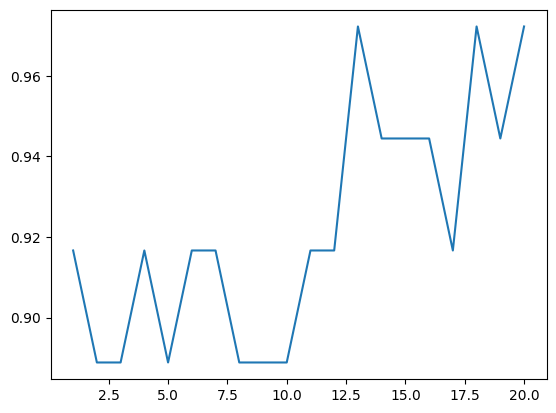

In [86]:
sns.lineplot(x=range(1,21), y=scores)

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url=file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data=pd.read_csv(file_url)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [93]:
data.drop(['Sex','Ticket','Embarked'],inplace=True, axis=1)

In [95]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

st_scaler=StandardScaler()
st_scaler.fit(data)
st_scaled=st_scaler.transform(data)
st_scaled

array([[ 0.82520863, -0.56367407,  0.43135024, -0.47432585, -0.78696114],
       [-1.57221121,  0.66921696,  0.43135024, -0.47432585,  1.27071078],
       [ 0.82520863, -0.25545131, -0.47519908, -0.47432585,  1.27071078],
       ...,
       [ 0.82520863, -0.10133993,  0.43135024,  2.00611934, -0.78696114],
       [-1.57221121, -0.25545131, -0.47519908, -0.47432585,  1.27071078],
       [ 0.82520863,  0.20688282, -0.47519908, -0.47432585, -0.78696114]])

In [97]:
mm_scaler=MinMaxScaler()
mn_scaled=mm_scaler.fit_transform(data)
pd.DataFrame(mn_scaled)

,0,1,2,3,4
0,1.0,0.271174,0.125,0.000000,0.0
1,0.0,0.472229,0.125,0.000000,1.0
2,1.0,0.321438,0.000,0.000000,1.0
3,0.0,0.434531,0.125,0.000000,1.0
4,1.0,0.434531,0.000,0.000000,0.0
...,...,...,...,...,...
884,0.5,0.334004,0.000,0.000000,0.0
885,0.0,0.233476,0.000,0.000000,1.0
886,1.0,0.346569,0.125,0.333333,0.0
887,0.0,0.321438,0.000,0.000000,1.0


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    int64  
 3   Parch     889 non-null    int64  
 4   Survived  889 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(data.drop("Survived",axis=1),
                                                 data['Survived'],test_size=0.2, random_state=100)


In [101]:
mn_scaler=MinMaxScaler()
mn_scaler.fit(X_train)

MinMaxScaler()

In [104]:
X_train_scaler=mn_scaler.fit_transform(X_train)
X_test_scaled=mn_scaler.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test_scaled)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.3595505617977528

In [109]:
st_scaler=StandardScaler()
st_scaler.fit(X_train)
X_train_scaler=st_scaler.fit_transform(X_train)
X_test_scaled=st_scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test_scaled)
pred
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.3707865168539326

In [110]:
rb_scaler=RobustScaler()
rb_scaler.fit(X_train)

X_train_scaler=rb_scaler.fit_transform(X_train)
X_test_scaled=rb_scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test_scaled)
pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.3707865168539326

In [112]:
st_scaler=StandardScaler()
st_scaler.fit(X_train)
X_train_scaler=st_scaler.fit_transform(X_train)
X_test_scaled=st_scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores=[]

for i in range(1,21):
  knn=KNeighborsClassifier()
  knn.fit(X_train,y_train)
  pred=knn.predict(X_test_scaled)
  accuracy_score(y_test,pred)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not 